In [325]:
import matplotlib.ticker
import pandas as pd  #manipulation des donnees
import numpy as np   #calcul mathematiques
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [17, 7]

In [326]:
tax_data = pd.read_excel(
    "../data/TaxPolicyCenter.xls",
    skiprows=5, skipfooter=4,
    header=[0,1,2],
    sheet_name=None
)
sample_df = tax_data["2019"]

In [327]:
total_data = 0
total_income_list = []
police_budget = []
budget_years = []
print("===================Data INFO=====================")
sample_df.info() #71 états/collectivités avec 11 colonnes de dépenses
for sheet in tax_data :
    income = 0
    df = tax_data[sheet]
    df.columns = ["_".join(index_str) for index_str in df.columns.to_flat_index()]
    df.rename(columns={
        "Unnamed: 0_level_0_Region and State_Unnamed: 0_level_2": "Region and State","Unnamed: 1_level_0_Region and State_Total": "Total",
        "Unnamed: 2_level_0_Inter-_governmental": "Inter-governmental",
        "Unnamed: 3_level_0_Inter-_Total": "Direct Total",
        "Elementary_and Secondary_Education": "Elementary and Secondary Education",
        "Elementary_Higher_Education": "Higher Education",
        "Elementary_Public_Welfare": "Public Welfare",
        "Elementary_Health and_Hospitals": "Health and Hospitals",
        "Elementary_Health and_Highways": "Highways",
        "Elementary_Health and_Police": "Police",
        "Elementary_All_Other": "All Other",
        "Personal_Income [1]_(Millions)": "Personal Income [1] (Millions)"
    }, inplace=True)
    print("===================Données manquantes pour " + sheet + " ?=====================")
    print(df.isna().sum())
    df.dropna(inplace=True) #Suppression des lignes avec une valeur manquantes
    total_income_list.insert(0,(df.iloc[0]['Personal Income [1] (Millions)']))
    police_budget.insert(0,(df.iloc[0]['Personal Income [1] (Millions)'])/100*(df.iloc[0]['Police']*100))
    budget_years.insert(0,(sheet))
    df = df[~df["Region and State"].isin(["United States", "New England", "Mideast", "Great Lakes", "Plains", "Southeast", "Southwest", "Rocky Moutain", "Far West [2]"])]
    total_data += df.shape[1]*df.shape[0]
sample_df["All years income"] = pd.Series(total_income_list)
sample_df["Police budget evolution"] = pd.Series(police_budget)

===================Data INFO=====================
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 12 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   (Unnamed: 0_level_0, Region and State, Unnamed: 0_level_2)  60 non-null     object 
 1   (Unnamed: 1_level_0, Region and State, Total)               60 non-null     float64
 2   (Unnamed: 2_level_0, Inter-, governmental)                  60 non-null     float64
 3   (Unnamed: 3_level_0, Inter-, Total)                         60 non-null     float64
 4   (Elementary, and Secondary, Education)                      60 non-null     float64
 5   (Elementary, Higher, Education)                             60 non-null     float64
 6   (Elementary, Public, Welfare)                               60 non-null     float64
 7   (Elementary, Health and, Hospitals)      

In [328]:
print("===================Shape=====================")
print(sample_df.shape)

===================Shape=====================
(60, 14)


In [329]:
print("===================Total des données=====================")
print(total_data)

===================Total des données=====================
10176


In [330]:
print("===================Description=====================")
print(sample_df.describe())

===================Description=====================
           Total  Inter-governmental  Direct Total  \
count  60.000000           60.000000     60.000000   
mean   18.281756            0.007065     18.274691   
std     3.785900            0.020820      3.783119   
min     0.180093            0.000000      0.179921   
25%    16.517344            0.000000     16.517344   
50%    18.147631            0.000018     18.147577   
75%    19.794667            0.001935     19.794667   
max    28.095157            0.108886     28.095157   

       Elementary and Secondary Education  Higher Education  Public Welfare  \
count                           60.000000         60.000000       60.000000   
mean                             3.867793          1.767521        4.031424   
std                              0.797018          0.613697        1.352895   
min                              0.038711          0.016792        0.040109   
25%                              3.579619          1.280230       

In [331]:
print("===================Incomes=====================")
#print(df_income["Income normalization"])
'''df_income["Income normalization"] = (df_income["Personal Income [1] (Millions)"] - df_income["Personal Income [1] (Millions)"].mean()) / df_income["Personal Income [1] (Millions)"].std()'''
#df_income["Income normalization"].value_counts().plot(kind="pie")

===================Incomes=====================


'df_income["Income normalization"] = (df_income["Personal Income [1] (Millions)"] - df_income["Personal Income [1] (Millions)"].mean()) / df_income["Personal Income [1] (Millions)"].std()'

In [332]:
print("===================Fréquence POLICE=====================")
print(sample_df["Police"].value_counts())

===================Fréquence POLICE=====================
0.006636    1
0.499674    1
0.839846    1
0.556318    1
0.419779    1
0.725179    1
0.677574    1
0.699466    1
0.608634    1
0.671187    1
0.505795    1
0.561099    1
0.616176    1
0.764157    1
0.846351    1
0.600182    1
0.572082    1
0.606264    1
0.605274    1
0.589629    1
0.660343    1
0.593690    1
0.628844    1
0.742768    1
0.790000    1
0.890150    1
0.674584    1
0.474570    1
0.833915    1
0.536538    1
0.629032    1
0.665023    1
0.580005    1
0.451019    1
0.481552    1
0.471798    1
0.556690    1
0.834149    1
0.615643    1
0.694050    1
0.702516    1
1.116419    1
0.756840    1
0.578226    1
0.771013    1
0.651559    1
0.467983    1
0.763175    1
0.470206    1
0.564050    1
0.692643    1
0.636177    1
0.621776    1
0.526321    1
0.601182    1
0.717056    1
0.659906    1
0.503377    1
0.522096    1
0.628013    1
Name: Police, dtype: int64


In [333]:
print("===================Moyenne=====================")

print("All years income :", sample_df["All years income"].mean())
print("Police budget :", sample_df["Police budget evolution"].mean())

===================Moyenne=====================
All years income : 14335731.153846154
Police budget : 99998.42100129538


In [334]:
print("===================Médiane=====================")
print("All years income :", sample_df["All years income"].median())
print("Police budget :", sample_df["Police budget evolution"].median())

===================Médiane=====================
All years income : 13998383.0
Police budget : 96875.94953533


In [335]:
print("===================Skew=====================")
print("All years income :", sample_df["All years income"].skew())
print("Police budget :", sample_df["Police budget evolution"].skew())

===================Skew=====================
All years income : 0.3442130183886384
Police budget : -0.025606281986510004


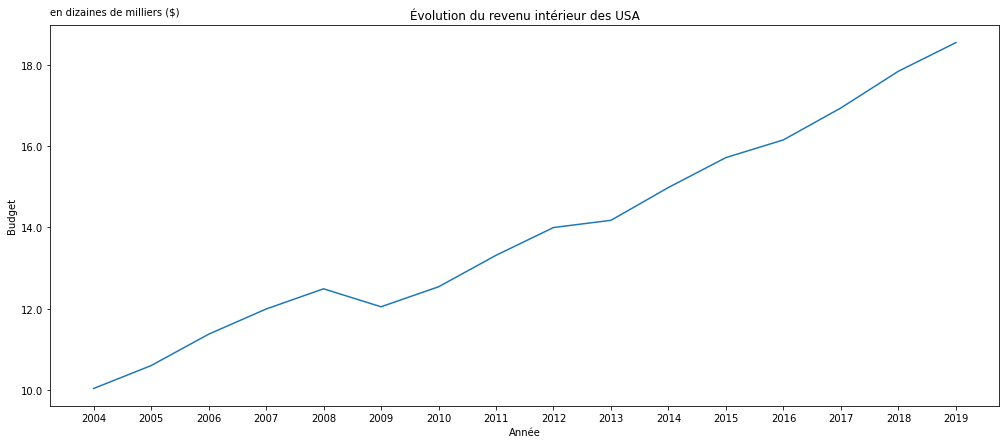

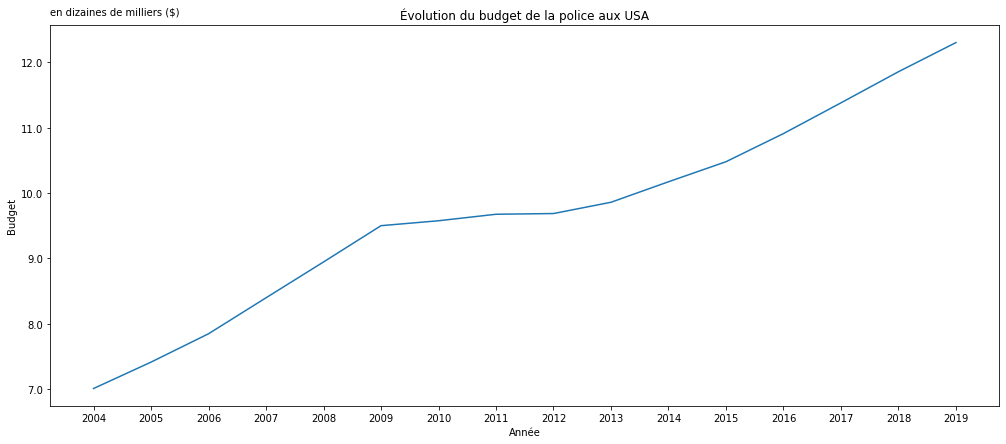

In [336]:
def formatter_1e6(x, pos):
    return str(round(x / 1e6, 1))

def formatter_1e4(x, pos):
    return str(round(x / 1e4, 1))

plt.plot(np.array(budget_years), np.array(total_income_list))
plt.gca().get_yaxis().set_major_formatter(formatter_1e6)
plt.gca().get_yaxis().set_minor_formatter(matplotlib.ticker.NullFormatter)
plt.title("Évolution du revenu intérieur des USA")
plt.xlabel("Année")
plt.ylabel("Budget")
plt.gca().text(0, 1.05, "en dizaines de milliers ($)", transform=plt.gca().transAxes, ha="left", va="top")
plt.show()

plt.plot(np.array(budget_years), np.array(police_budget))
plt.gca().get_yaxis().set_major_formatter(formatter_1e4)
plt.gca().get_yaxis().set_minor_formatter(matplotlib.ticker.NullFormatter)
plt.title("Évolution du budget de la police aux USA")
plt.xlabel("Année")
plt.ylabel("Budget")
plt.gca().text(0, 1.05, "en dizaines de milliers ($)", transform=plt.gca().transAxes, ha="left", va="top")
plt.show()